### Libraries

In [3]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [140]:
import sklearn
print(sklearn.__version__)

1.3.0


# STAGE II

In [4]:
nigeria_air_pollution = pd.read_csv('air_pollution_api_final_new_07122023.csv')
nigeria_air_pollution.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,lon,lat,state_name,datetime_utc,aqi_desc,year,month,day,hour
0,5,1014.71,0.00,4.20,27.18,1.06,119.62,246.62,1.52,7.515307,5.454095,Abia,2023-01-01 00:00:00+00:00,Very Poor,2023,1,1,0
1,5,1001.36,0.00,4.16,18.95,0.72,120.51,245.57,1.22,7.515307,5.454095,Abia,2023-01-01 01:00:00+00:00,Very Poor,2023,1,1,1
2,5,1054.76,0.01,4.28,10.82,0.63,128.17,252.65,2.31,7.515307,5.454095,Abia,2023-01-01 02:00:00+00:00,Very Poor,2023,1,1,2
3,5,1108.17,0.02,4.37,7.60,0.79,138.33,264.60,3.36,7.515307,5.454095,Abia,2023-01-01 03:00:00+00:00,Very Poor,2023,1,1,3
4,5,1161.58,0.02,4.41,8.23,1.10,148.25,276.84,3.86,7.515307,5.454095,Abia,2023-01-01 04:00:00+00:00,Very Poor,2023,1,1,4


In [18]:
nigeria_air_pollution.dtypes

aqi               int64
co              float64
no              float64
no2             float64
o3              float64
so2             float64
pm2_5           float64
pm10            float64
nh3             float64
lon             float64
lat             float64
state_name       object
datetime_utc     object
aqi_desc         object
year              int64
month             int64
day               int64
hour              int64
dtype: object

In [6]:
# # Convert 'datetime_utc' to datetime format
# nigeria_air_pollution['datetime_utc'] = pd.to_datetime(nigeria_air_pollution['datetime_utc'], utc=True)

In [19]:
nigeria_air_pollution.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,lon,lat,state_name,datetime_utc,aqi_desc,year,month,day,hour
0,5,1014.71,0.00,4.20,27.18,1.06,119.62,246.62,1.52,7.515307,5.454095,Abia,2023-01-01 00:00:00+00:00,Very Poor,2023,1,1,0
1,5,1001.36,0.00,4.16,18.95,0.72,120.51,245.57,1.22,7.515307,5.454095,Abia,2023-01-01 01:00:00+00:00,Very Poor,2023,1,1,1
2,5,1054.76,0.01,4.28,10.82,0.63,128.17,252.65,2.31,7.515307,5.454095,Abia,2023-01-01 02:00:00+00:00,Very Poor,2023,1,1,2
3,5,1108.17,0.02,4.37,7.60,0.79,138.33,264.60,3.36,7.515307,5.454095,Abia,2023-01-01 03:00:00+00:00,Very Poor,2023,1,1,3
4,5,1161.58,0.02,4.41,8.23,1.10,148.25,276.84,3.86,7.515307,5.454095,Abia,2023-01-01 04:00:00+00:00,Very Poor,2023,1,1,4


In [104]:
#print(nigeria_air_pollution.columns)
nigeria_air_pollution.columns

Index(['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'lon',
       'lat', 'state_name', 'datetime_utc', 'aqi_desc', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [22]:
# Get aqi values and desc
aqi_summary = nigeria_air_pollution[['aqi', 'aqi_desc']].drop_duplicates()
aqi_summary.head()

,aqi,aqi_desc
0,5,Very Poor
25,4,Poor
115,2,Fair
126,3,Moderate
469,1,Good


## Gradient Boosting Regressor

In [26]:
nigeria_air_pollution = pd.read_csv('air_pollution_api_final_new_07122023.csv')
nigeria_air_pollution.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,lon,lat,state_name,datetime_utc,aqi_desc,year,month,day,hour
0,5,1014.71,0.00,4.20,27.18,1.06,119.62,246.62,1.52,7.515307,5.454095,Abia,2023-01-01 00:00:00+00:00,Very Poor,2023,1,1,0
1,5,1001.36,0.00,4.16,18.95,0.72,120.51,245.57,1.22,7.515307,5.454095,Abia,2023-01-01 01:00:00+00:00,Very Poor,2023,1,1,1
2,5,1054.76,0.01,4.28,10.82,0.63,128.17,252.65,2.31,7.515307,5.454095,Abia,2023-01-01 02:00:00+00:00,Very Poor,2023,1,1,2
3,5,1108.17,0.02,4.37,7.60,0.79,138.33,264.60,3.36,7.515307,5.454095,Abia,2023-01-01 03:00:00+00:00,Very Poor,2023,1,1,3
4,5,1161.58,0.02,4.41,8.23,1.10,148.25,276.84,3.86,7.515307,5.454095,Abia,2023-01-01 04:00:00+00:00,Very Poor,2023,1,1,4


In [9]:
# Drop utc time format and some other column
nigeria_air_pollution = nigeria_air_pollution.drop(columns=['datetime_utc','year','aqi_desc'])

In [10]:
nigeria_air_pollution.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,lon,lat,state_name,month,day,hour,state_label
0,5,1014.71,0.00,4.20,27.18,1.06,119.62,246.62,1.52,7.515307,5.454095,Abia,1,1,0,0
1,5,1001.36,0.00,4.16,18.95,0.72,120.51,245.57,1.22,7.515307,5.454095,Abia,1,1,1,0
2,5,1054.76,0.01,4.28,10.82,0.63,128.17,252.65,2.31,7.515307,5.454095,Abia,1,1,2,0
3,5,1108.17,0.02,4.37,7.60,0.79,138.33,264.60,3.36,7.515307,5.454095,Abia,1,1,3,0
4,5,1161.58,0.02,4.41,8.23,1.10,148.25,276.84,3.86,7.515307,5.454095,Abia,1,1,4,0


In [29]:
nigeria_air_pollution.columns

Index(['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'lon',
       'lat', 'state_name', 'month', 'day', 'hour'],
      dtype='object')

In [5]:
# label encode state-Name
label_encoder = LabelEncoder()
nigeria_air_pollution['state_label'] = label_encoder.fit_transform(nigeria_air_pollution['state_name'])

In [6]:
# Get encoded state-names
unique_labels = nigeria_air_pollution['state_label'].unique()
state_names = label_encoder.inverse_transform(unique_labels)
merge_df = pd.DataFrame({"state_label" : unique_labels,"state_name" :state_names})
merge_df.head(37)



,state_label,state_name
0,0,Abia
1,1,Adamawa
2,2,Akwa Ibom
3,3,Anambra
4,4,Bauchi
5,5,Bayelsa
6,6,Benue
7,7,Borno
8,8,Cross River
9,9,Delta


In [8]:
nigeria_air_pollution.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,lon,lat,state_name,datetime_utc,aqi_desc,year,month,day,hour,state_label
0,5,1014.71,0.00,4.20,27.18,1.06,119.62,246.62,1.52,7.515307,5.454095,Abia,2023-01-01 00:00:00+00:00,Very Poor,2023,1,1,0,0
1,5,1001.36,0.00,4.16,18.95,0.72,120.51,245.57,1.22,7.515307,5.454095,Abia,2023-01-01 01:00:00+00:00,Very Poor,2023,1,1,1,0
2,5,1054.76,0.01,4.28,10.82,0.63,128.17,252.65,2.31,7.515307,5.454095,Abia,2023-01-01 02:00:00+00:00,Very Poor,2023,1,1,2,0
3,5,1108.17,0.02,4.37,7.60,0.79,138.33,264.60,3.36,7.515307,5.454095,Abia,2023-01-01 03:00:00+00:00,Very Poor,2023,1,1,3,0
4,5,1161.58,0.02,4.41,8.23,1.10,148.25,276.84,3.86,7.515307,5.454095,Abia,2023-01-01 04:00:00+00:00,Very Poor,2023,1,1,4,0


In [22]:
# columns to normalize
features_to_normalize = nigeria_air_pollution.drop(['aqi','state_name'], axis=1)

# Normalize using Min-Max scaling
scaler = MinMaxScaler()
nigeria_air_pollution_scaled = pd.DataFrame(scaler.fit_transform(features_to_normalize), columns=features_to_normalize.columns)

# Add the 'aqi' column back to the normalized DataFrame
nigeria_air_pollution_scaled['aqi'] = nigeria_air_pollution['aqi']

In [23]:
# Save scaler for later
joblib.dump(scaler, 'scaler_gbr_appr1.pkl')

['scaler_gbr_appr1.pkl']

In [24]:
nigeria_air_pollution_scaled.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,lon,lat,month,day,hour,state_label,aqi
0,0.042334,0.000000,0.020837,0.969164,0.018182,0.058319,0.021726,0.009376,0.413046,0.083286,0.0,0.0,0.000000,0.0,5
1,0.041663,0.000000,0.020638,0.968369,0.012238,0.058754,0.021633,0.007525,0.413046,0.083286,0.0,0.0,0.043478,0.0,5
2,0.044346,0.000068,0.021237,0.967583,0.010664,0.062505,0.022258,0.014249,0.413046,0.083286,0.0,0.0,0.086957,0.0,5
3,0.047028,0.000136,0.021687,0.967272,0.013462,0.067479,0.023314,0.020725,0.413046,0.083286,0.0,0.0,0.130435,0.0,5
4,0.049711,0.000136,0.021887,0.967333,0.018881,0.072335,0.024395,0.023810,0.413046,0.083286,0.0,0.0,0.173913,0.0,5


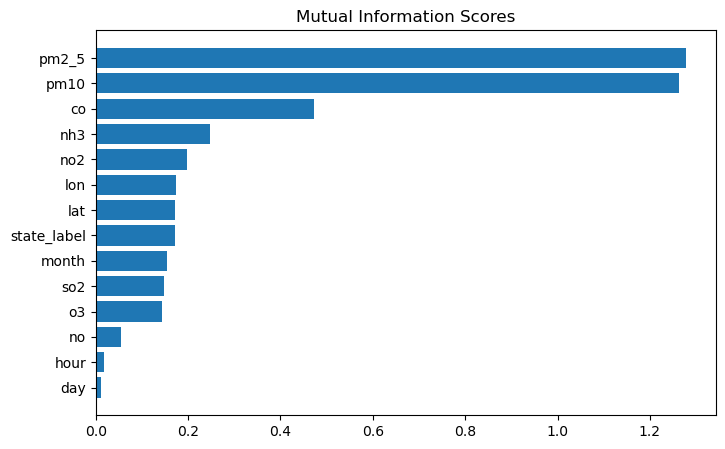

In [36]:
from sklearn.feature_selection import mutual_info_regression

#feature_x = air_quality_encoded.drop('aqi', axis=1)
feature_x = nigeria_air_pollution[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3','lon','lat','month','day','hour','state_label']]
label_y = nigeria_air_pollution['aqi']

mi_scores = mutual_info_regression(feature_x, label_y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=feature_x.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
#Check feature importance
from sklearn.ensemble import RandomForestRegressor

label_y = nigeria_air_pollution[['aqi']]
feature_x = nigeria_air_pollution[['lon', 'lat', 'month', 'day', 'hour','state_label','co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]

# RandomForest
rf_model = RandomForestRegressor()
rf_model.fit(feature_x, label_y)

# Get importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=feature_x.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title('Random Forest Feature Importances')
plt.show()

In [25]:
#with all features - APPROACH 1 - This generally performed better with lower metric scores and a higher R2 when compared to approach 2 with reduced features
# features (X) and target variable (y)
X = nigeria_air_pollution_scaled.drop('aqi', axis=1)
y = nigeria_air_pollution_scaled['aqi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# GBR model code...
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print("Gradient Boosting RMSE:", gb_rmse)
print("Gradient Boosting MAE:", gb_mae)
print("Gradient Boosting R2:", gb_r2)


Gradient Boosting RMSE: 0.03173827957248152
Gradient Boosting MAE: 0.009658592439947294
Gradient Boosting R2: 0.9995271711097157


In [26]:
# APPROACH 1 predictions
gb_predictions_df = pd.DataFrame({'Actual_AQI': y_test.values, 'GBR_Predictions': gb_predictions})
gb_predictions_df.head()


,Actual_AQI,GBR_Predictions
0,2,2.001062
1,5,4.999285
2,1,1.004644
3,1,1.001464
4,2,1.980363


In [48]:
#save metrics
performance_metrics = {
    "Name" : "gb_model_approach1",
    'RMSE': gb_rmse,
    'MAE' : gb_mae,
    "R2 Score" : gb_r2
}

with open('Approach1_performance_metrics.json', 'w') as f:
    json.dump(performance_metrics, f)


In [51]:
#print predictions
result = pd.DataFrame()
result['y_test'] = y_test
result['Predictions'] = gb_predictions
result.head()

result.to_excel('Pred_Result_Approach1.xlsx')

In [55]:
# Save model
joblib.dump(gb_model, 'gbappr_1_model.joblib')

['gbappr_1_model.joblib']

In [ ]:
# random data for testing
np.random.seed(42)  #reproducibility
random_data = pd.DataFrame({
    'co': np.random.uniform(0, 100, size=1),
    'no': np.random.uniform(0, 1, size=1),
    'no2': np.random.uniform(0, 0.1, size=1),
    'o3': np.random.uniform(0, 50, size=1),
    'so2': np.random.uniform(0, 200, size=1),
    'pm2_5': np.random.uniform(0, 500, size=1),
    'pm10': np.random.uniform(0, 300, size=1),
    'nh3': np.random.uniform(0, 10, size=1),
    'lon': np.random.uniform(5, 10, size=1),
    'lat': np.random.uniform(5, 7, size=1),
    'month': np.random.randint(1, 13, size=1),
    'day': np.random.randint(1, 32, size=1),
    'hour': np.random.randint(0, 24, size=1),
    'state_label' : 37
})

new_data_normalized = scaler.transform(random_data)

#new prediction
new_pred = gb_model.predict(new_data_normalized)

print(f"Predicted AQI Value: {new_pred[0]}")


In [ ]:
# random data for testing
random_data = pd.DataFrame({
    'co': 55,
    'no': 0.6,
    'no2': 0.07,
    'o3': 35,
    'so2': 155,
    'pm2_5': 700,
    'pm10': 5000,
    'nh3': 6,
    'lon': 10.0288,
    'lat': 10.6228,
    'month': 12,
    'day': 15,
    'hour': 22,
    'state_label': 4
}, index=[0]) 

new_data_normalized = scaler.transform(random_data)

# new prediction
new_pred = gb_model.predict(new_data_normalized)

print(f"Predicted AQI Value: {new_pred[0]}")


# 2

In [12]:
nigeria_air_pollution.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,lon,lat,state_name,month,day,hour,state_label
0,5,1014.71,0.00,4.20,27.18,1.06,119.62,246.62,1.52,7.515307,5.454095,Abia,1,1,0,0
1,5,1001.36,0.00,4.16,18.95,0.72,120.51,245.57,1.22,7.515307,5.454095,Abia,1,1,1,0
2,5,1054.76,0.01,4.28,10.82,0.63,128.17,252.65,2.31,7.515307,5.454095,Abia,1,1,2,0
3,5,1108.17,0.02,4.37,7.60,0.79,138.33,264.60,3.36,7.515307,5.454095,Abia,1,1,3,0
4,5,1161.58,0.02,4.41,8.23,1.10,148.25,276.84,3.86,7.515307,5.454095,Abia,1,1,4,0


In [13]:
# columns to normalize 
features_to_normalize = nigeria_air_pollution.drop(['aqi','co', 'no', 'no2', 'o3', 'so2', 'nh3','state_name'], axis=1)

# Normalize using Min-Max scaling
scaler = MinMaxScaler()
nigeria_air_pollution_scaled = pd.DataFrame(scaler.fit_transform(features_to_normalize), columns=features_to_normalize.columns)

# Add the 'aqi' column back to the normalized DataFrame
nigeria_air_pollution_scaled['aqi'] = nigeria_air_pollution['aqi']

In [85]:
# Save scaler for later
joblib.dump(scaler, 'scaler_gbr_appr2.pkl')

['scaler_gbr_appr2.pkl']

In [14]:
nigeria_air_pollution_scaled.head()

,pm2_5,pm10,lon,lat,month,day,hour,state_label,aqi
0,0.058319,0.021726,0.413046,0.083286,0.0,0.0,0.000000,0.0,5
1,0.058754,0.021633,0.413046,0.083286,0.0,0.0,0.043478,0.0,5
2,0.062505,0.022258,0.413046,0.083286,0.0,0.0,0.086957,0.0,5
3,0.067479,0.023314,0.413046,0.083286,0.0,0.0,0.130435,0.0,5
4,0.072335,0.024395,0.413046,0.083286,0.0,0.0,0.173913,0.0,5


In [15]:
#with fewer features - APPROACH 2
# features (X) and target variable (y)
X = nigeria_air_pollution_scaled.drop('aqi', axis=1)
y = nigeria_air_pollution_scaled['aqi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# GBR model code...
gb2_model = GradientBoostingRegressor()
gb2_model.fit(X_train, y_train)
gb2_predictions = gb2_model.predict(X_test)
gb2_rmse = np.sqrt(mean_squared_error(y_test, gb2_predictions))
gb2_mae = mean_absolute_error(y_test, gb2_predictions)
gb2_r2 = r2_score(y_test, gb2_predictions)
print("Gradient Boosting RMSE:", gb2_rmse)
print("Gradient Boosting MAE:", gb2_mae)
print("Gradient Boosting R2:", gb2_r2)


Gradient Boosting RMSE: 0.03737639328923956
Gradient Boosting MAE: 0.008125374516938799
Gradient Boosting R2: 0.9993442594756968


In [16]:
# APPROACH 2 predictions
gb2_predictions_df = pd.DataFrame({'Actual_AQI': y_test.values, 'GBR_Predictions': gb2_predictions})
gb2_predictions_df.head()


,Actual_AQI,GBR_Predictions
0,2,1.998979
1,5,4.997470
2,1,1.004111
3,1,1.001475
4,2,1.995251


In [89]:
#save metrics
performance_metrics = {
    "Name" : "gb_model_approach2",
    'RMSE': gb2_rmse,
    'MAE' : gb2_mae,
    "R2 Score" : gb2_r2
}

with open('Approach2_performance_metrics.json', 'w') as f:
    json.dump(performance_metrics, f)


In [90]:
#print predictions
result = pd.DataFrame()
result['y_test'] = y_test
result['Predictions'] = gb2_predictions
result.head()

result.to_excel('Pred_Result_Approach2.xlsx')

In [91]:
# Save model
joblib.dump(gb2_model, 'gbappr_2_model.joblib')

['gbappr_2_model.joblib']

In [ ]:
# Generate random data for testing
np.random.seed(42)  # for reproducibility
random_data = pd.DataFrame({
    'pm2_5': np.random.uniform(0, 500, size=1),
    'pm10': np.random.uniform(0, 300, size=1),
    'lon': np.random.uniform(5, 10, size=1),
    'lat': np.random.uniform(5, 7, size=1),
    'month': np.random.randint(1, 13, size=1),
    'day': np.random.randint(1, 32, size=1),
    'hour': np.random.randint(0, 24, size=1),
    'state_label' : 3
})

# Normalize
new_data_normalized = scaler.transform(random_data)

# Make a new prediction
new_pred = gb2_model.predict(new_data_normalized)

# Display the predicted AQI value
print(f"Predicted AQI Value: {new_pred[0]}")


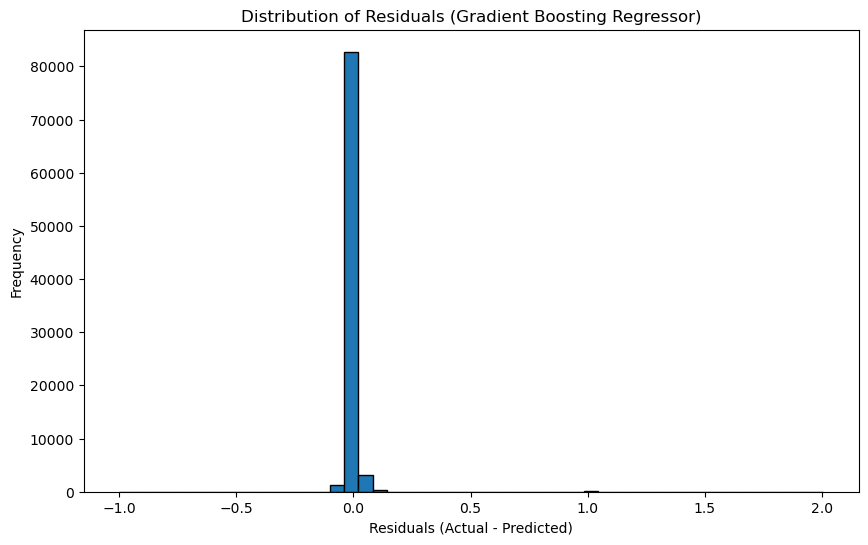

In [94]:
residuals = y_test - gb2_predictions
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Gradient Boosting Regressor)")
plt.show()

## Multi- Output Regressor

In [2]:
nigeria_air_pollution = pd.read_csv('air_pollution_api_final_new_07122023.csv')
nigeria_air_pollution.head()

NameError: name 'pd' is not defined

In [96]:
# Drop utc time format and others
nigeria_air_pollution = nigeria_air_pollution.drop(columns=['datetime_utc','year','aqi_desc'])

In [1]:
nigeria_air_pollution.head()

NameError: name 'nigeria_air_pollution' is not defined

In [98]:
nigeria_air_pollution.columns

Index(['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'lon',
       'lat', 'state_name', 'month', 'day', 'hour'],
      dtype='object')

In [99]:
# label encode state-Name
label_encoder = LabelEncoder()
nigeria_air_pollution['state_label'] = label_encoder.fit_transform(nigeria_air_pollution['state_name'])



In [145]:
# columns to normalize
columns_to_normalize = ['lon', 'lat', 'month', 'day', 'hour','state_label']
features_to_normalize = nigeria_air_pollution[columns_to_normalize]

# Normalize using Min-Max scaling
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features_to_normalize), columns=columns_to_normalize)

# Combine normalized features with other non-normalized columns
nigeria_air_pollution_scaled = pd.concat([nigeria_air_pollution.drop(columns=columns_to_normalize), normalized_features], axis=1)


In [102]:
# Save scaler for later
joblib.dump(scaler, 'scaler_mgbr1.pkl')

['scaler_mgbr1.pkl']

In [146]:
nigeria_air_pollution_scaled.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,state_name,lon,lat,month,day,hour,state_label
0,5,1014.71,0.00,4.20,27.18,1.06,119.62,246.62,1.52,Abia,0.413046,0.083286,0.0,0.0,0.000000,0.0
1,5,1001.36,0.00,4.16,18.95,0.72,120.51,245.57,1.22,Abia,0.413046,0.083286,0.0,0.0,0.043478,0.0
2,5,1054.76,0.01,4.28,10.82,0.63,128.17,252.65,2.31,Abia,0.413046,0.083286,0.0,0.0,0.086957,0.0
3,5,1108.17,0.02,4.37,7.60,0.79,138.33,264.60,3.36,Abia,0.413046,0.083286,0.0,0.0,0.130435,0.0
4,5,1161.58,0.02,4.41,8.23,1.10,148.25,276.84,3.86,Abia,0.413046,0.083286,0.0,0.0,0.173913,0.0


In [104]:
nigeria_air_pollution_scaled.dtypes

aqi              int64
co             float64
no             float64
no2            float64
o3             float64
so2            float64
pm2_5          float64
pm10           float64
nh3            float64
state_name      object
lon            float64
lat            float64
month          float64
day            float64
hour           float64
state_label    float64
dtype: object

             Importance
day            0.297962
month          0.246513
lat            0.197071
hour           0.177012
lon            0.053510
state_label    0.027932


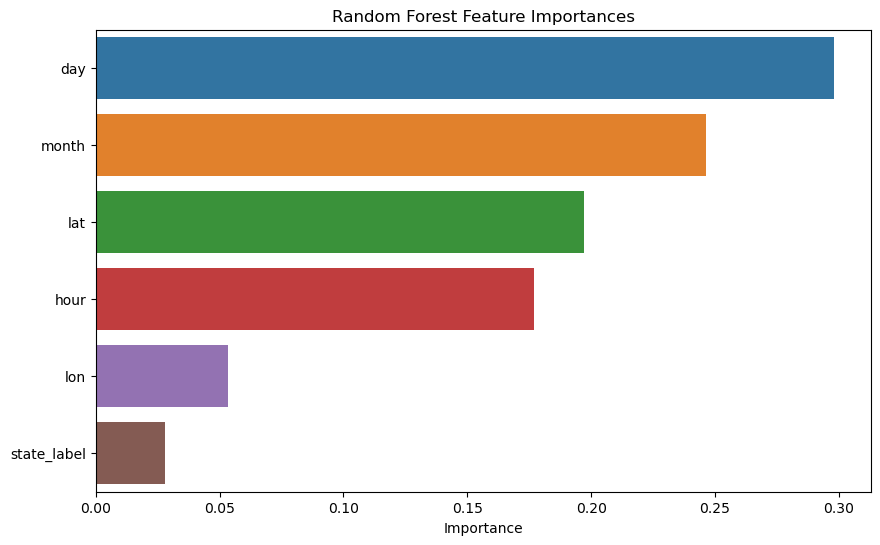

In [105]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'aqi' and other columns are in label_y
label_y = nigeria_air_pollution[['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
feature_x = nigeria_air_pollution[['lon', 'lat', 'month', 'day', 'hour','state_label']]

# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(feature_x, label_y)

# Get feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=feature_x.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title('Random Forest Feature Importances')
plt.show()


In [147]:
# features (X) and target variable (y)
X = nigeria_air_pollution_scaled[['lon', 'lat', 'month', 'day', 'hour','state_label']]
y = nigeria_air_pollution_scaled[['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# GBR model code...
gbr_model = GradientBoostingRegressor()

# Wrapped into MultiOutputRegressor
multioutput_gbr = MultiOutputRegressor(gbr_model)

# Fit model with train
multioutput_gbr.fit(X_train, y_train)

# Make predictions test
mgbr_predictions = multioutput_gbr.predict(X_test)
# metrics
mgbr_rmse = np.sqrt(mean_squared_error(y_test, mgbr_predictions))
mgbr_mae = mean_absolute_error(y_test, mgbr_predictions)
mgbr_r2 = r2_score(y_test, mgbr_predictions)
print("Gradient Boosting RMSE:", mgbr_rmse)
print("Gradient Boosting MAE:", mgbr_mae)
print("Gradient Boosting R2:", mgbr_r2)

Gradient Boosting RMSE: 160.93897438155983
Gradient Boosting MAE: 36.90476317196818
Gradient Boosting R2: 0.41958707316421723


In [204]:
# DataFrame for each output
mgbr_predictions_df = pd.DataFrame(mgbr_predictions, columns=['MGBR_aqi', 'MGBR_co', 'MGBR_no', 'MGBR_no2', 'MGBR_o3', 'MGBR_so2', 'MGBR_pm2_5', 'MGBR_pm10', 'MGBR_nh3'])

# Add the 'test' columns
mgbr_predictions_df[['y_test_aqi', 'y_test_co', 'y_test_no', 'y_test_no2', 'y_test_o3', 'y_test_so2', 'y_test_pm2_5', 'y_test_pm10', 'y_test_nh3']] = y_test.values
mgbr_predictions_df.head()

# Display only selected columns
selected_columns = ['MGBR_aqi', 'y_test_aqi', 'MGBR_pm2_5', 'y_test_pm2_5', 'MGBR_pm10', 'y_test_pm10']
mgbr_predictions_df[selected_columns].head()

# # Display only selected columns
# selected_columns = ['MGBR_co', 'y_test_co', 'MGBR_nh3', 'y_test_nh3', 'MGBR_so2', 'y_test_so2']
# mgbr_predictions_df[selected_columns].head()



,MGBR_aqi,y_test_aqi,MGBR_pm2_5,y_test_pm2_5,MGBR_pm10,y_test_pm10
0,2.055826,2.0,15.516170,19.85,9.446239,34.25
1,4.654954,5.0,165.622385,213.96,803.500558,855.64
2,1.547437,1.0,12.465297,9.49,4.820430,13.04
3,1.858623,1.0,18.829958,6.55,39.857742,9.32
4,2.719921,2.0,32.907989,8.25,52.564056,20.82


In [127]:
#save metrics
performance_metrics = {
    "Name" : "mgbr_model_approach1",
    'RMSE': mgbr_rmse,
    'MAE' : mgbr_mae,
    "R2 Score" : mgbr_r2
}

with open('mgbr_Appr1_performance_metrics.json', 'w') as f:
    json.dump(performance_metrics, f)


In [128]:
# print predictions
result = pd.DataFrame(index=y_test.index)
result[['mgbr_Predicted_aqi', 'mgbr_Predicted_co', 'mgbr_Predicted_no', 'mgbr_Predicted_no2', 'mgbr_Predicted_o3', 'mgbr_Predicted_so2', 'mgbr_Predicted_pm2_5', 'mgbr_Predicted_pm10', 'mgbr_Predicted_nh3']] = mgbr_predictions

# Add the actual values
result[['y_test_aqi', 'y_test_co', 'y_test_no', 'y_test_no2', 'y_test_o3', 'y_test_so2', 'y_test_pm2_5', 'y_test_pm10', 'y_test_nh3']] = y_test

result.to_excel('pred_Result_MGBR1.xlsx')


In [129]:
# Save model
joblib.dump(multioutput_gbr, 'mgbrappr_1_model.joblib')

['mgbrappr_1_model.joblib']

In [ ]:
# Generate random data for testing
np.random.seed(42)  # for reproducibility
random_data = pd.DataFrame({
    'lon': np.random.uniform(5, 10, size=1),
    'lat': np.random.uniform(5, 7, size=1),
    'month': np.random.randint(1, 13, size=1),
    'day': np.random.randint(1, 32, size=1),
    'hour': np.random.randint(0, 24, size=1),
    'state_label' : 24
})

# Normalize
new_data_normalized = scaler.transform(random_data)

# Make a new prediction
new_pred = multioutput_gbr.predict(new_data_normalized)

# Display the predicted AQI value
print(f"Predicted AQI Value: {new_pred[0]}")


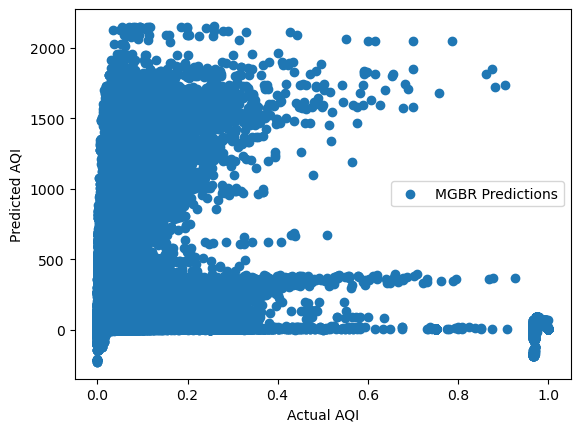

In [141]:
# Assuming 'y_test' is your actual AQI values and 'gbr_predictions' is your GBR predictions
plt.scatter(y_test, mgbr_predictions, label='MGBR Predictions')
# plt.scatter(y_test, lstm_predictions, label='LSTM Predictions')  # Uncomment if you have LSTM predictions
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.legend()
plt.show()


###### Engineer new datetime features

In [150]:
nigeria_air_pollution = pd.read_csv('air_pollution_api_final_new_07122023.csv')
nigeria_air_pollution.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,lon,lat,state_name,datetime_utc,aqi_desc,year,month,day,hour
0,5,1014.71,0.00,4.20,27.18,1.06,119.62,246.62,1.52,7.515307,5.454095,Abia,2023-01-01 00:00:00+00:00,Very Poor,2023,1,1,0
1,5,1001.36,0.00,4.16,18.95,0.72,120.51,245.57,1.22,7.515307,5.454095,Abia,2023-01-01 01:00:00+00:00,Very Poor,2023,1,1,1
2,5,1054.76,0.01,4.28,10.82,0.63,128.17,252.65,2.31,7.515307,5.454095,Abia,2023-01-01 02:00:00+00:00,Very Poor,2023,1,1,2
3,5,1108.17,0.02,4.37,7.60,0.79,138.33,264.60,3.36,7.515307,5.454095,Abia,2023-01-01 03:00:00+00:00,Very Poor,2023,1,1,3
4,5,1161.58,0.02,4.41,8.23,1.10,148.25,276.84,3.86,7.515307,5.454095,Abia,2023-01-01 04:00:00+00:00,Very Poor,2023,1,1,4


In [181]:
nigeria_air_pollution.dtypes

aqi                 int64
co                float64
no                float64
no2               float64
o3                float64
so2               float64
pm2_5             float64
pm10              float64
nh3               float64
lon               float64
lat               float64
state_name         object
month               int64
day                 int64
hour                int64
time_of_day        object
day_of_week         int32
is_weekend          int32
time_day_label      int32
state_label         int32
dtype: object

In [154]:
nigeria_air_pollution['time_of_day'] = nigeria_air_pollution['hour'].apply(lambda x: 'morning' if 6 <= x < 12 else 'afternoon' if 12 <= x < 18 else 'evening' if 18 <= x < 24 else 'night')
nigeria_air_pollution['day_of_week'] = pd.to_datetime(nigeria_air_pollution[['year', 'month', 'day']]).dt.dayofweek
nigeria_air_pollution['is_weekend'] = nigeria_air_pollution['day_of_week'].isin([5, 6]).astype(int)


In [ ]:
nigeria_air_pollution[:50]

In [161]:
# Get aqi values and desc
time_of_day_summary = nigeria_air_pollution[['time_of_day']].drop_duplicates()
time_of_day_summary.head()

,time_of_day
0,night
6,morning
12,afternoon
18,evening


In [162]:
# label encode time_day
label_encoder = LabelEncoder()
nigeria_air_pollution['time_day_label'] = label_encoder.fit_transform(nigeria_air_pollution['time_of_day'])

In [163]:
nigeria_air_pollution.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,lon,...,datetime_utc,aqi_desc,year,month,day,hour,time_of_day,day_of_week,is_weekend,time_day_label
0,5,1014.71,0.00,4.20,27.18,1.06,119.62,246.62,1.52,7.515307,...,2023-01-01 00:00:00+00:00,Very Poor,2023,1,1,0,night,6,1,3
1,5,1001.36,0.00,4.16,18.95,0.72,120.51,245.57,1.22,7.515307,...,2023-01-01 01:00:00+00:00,Very Poor,2023,1,1,1,night,6,1,3
2,5,1054.76,0.01,4.28,10.82,0.63,128.17,252.65,2.31,7.515307,...,2023-01-01 02:00:00+00:00,Very Poor,2023,1,1,2,night,6,1,3
3,5,1108.17,0.02,4.37,7.60,0.79,138.33,264.60,3.36,7.515307,...,2023-01-01 03:00:00+00:00,Very Poor,2023,1,1,3,night,6,1,3
4,5,1161.58,0.02,4.41,8.23,1.10,148.25,276.84,3.86,7.515307,...,2023-01-01 04:00:00+00:00,Very Poor,2023,1,1,4,night,6,1,3


In [168]:
# label encode state-Name
label_encoder = LabelEncoder()
nigeria_air_pollution['state_label'] = label_encoder.fit_transform(nigeria_air_pollution['state_name'])


In [165]:
# Get encoded tdl
unique_tdl = nigeria_air_pollution['time_day_label'].unique()
time_day_names = label_encoder.inverse_transform(unique_tdl)
merge_dft = pd.DataFrame({"time_day_label" : unique_tdl,"time_day_names" :time_day_names})
merge_dft.head(5)


,time_day_label,time_day_names
0,3,night
1,2,morning
2,0,afternoon
3,1,evening


In [166]:
# Drop utc time format and others
nigeria_air_pollution = nigeria_air_pollution.drop(columns=['datetime_utc','year','aqi_desc'])

In [169]:
nigeria_air_pollution.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,lon,lat,state_name,month,day,hour,time_of_day,day_of_week,is_weekend,time_day_label,state_label
0,5,1014.71,0.00,4.20,27.18,1.06,119.62,246.62,1.52,7.515307,5.454095,Abia,1,1,0,night,6,1,3,0
1,5,1001.36,0.00,4.16,18.95,0.72,120.51,245.57,1.22,7.515307,5.454095,Abia,1,1,1,night,6,1,3,0
2,5,1054.76,0.01,4.28,10.82,0.63,128.17,252.65,2.31,7.515307,5.454095,Abia,1,1,2,night,6,1,3,0
3,5,1108.17,0.02,4.37,7.60,0.79,138.33,264.60,3.36,7.515307,5.454095,Abia,1,1,3,night,6,1,3,0
4,5,1161.58,0.02,4.41,8.23,1.10,148.25,276.84,3.86,7.515307,5.454095,Abia,1,1,4,night,6,1,3,0


In [170]:
# columns to normalize
columns_to_normalize = ['lon', 'lat', 'month', 'day', 'hour','state_label','day_of_week','is_weekend','time_day_label']
features_to_normalize = nigeria_air_pollution[columns_to_normalize]

# Normalize using Min-Max scaling
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features_to_normalize), columns=columns_to_normalize)

# Combine normalized features with other non-normalized columns
nigeria_air_pollution_scaled = pd.concat([nigeria_air_pollution.drop(columns=columns_to_normalize), normalized_features], axis=1)


In [171]:
# Save scaler for later
joblib.dump(scaler, 'scaler_mgbr2_engneerfeatures.pkl')

['scaler_mgbr2_engneerfeatures.pkl']

In [182]:
nigeria_air_pollution_scaled.dtypes

aqi                 int64
co                float64
no                float64
no2               float64
o3                float64
so2               float64
pm2_5             float64
pm10              float64
nh3               float64
state_name         object
time_of_day        object
lon               float64
lat               float64
month             float64
day               float64
hour              float64
state_label       float64
day_of_week       float64
is_weekend        float64
time_day_label    float64
dtype: object

In [183]:
nigeria_air_pollution_scaled.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,state_name,time_of_day,lon,lat,month,day,hour,state_label,day_of_week,is_weekend,time_day_label
0,5,1014.71,0.00,4.20,27.18,1.06,119.62,246.62,1.52,Abia,night,0.413046,0.083286,0.0,0.0,0.000000,0.0,1.0,1.0,1.0
1,5,1001.36,0.00,4.16,18.95,0.72,120.51,245.57,1.22,Abia,night,0.413046,0.083286,0.0,0.0,0.043478,0.0,1.0,1.0,1.0
2,5,1054.76,0.01,4.28,10.82,0.63,128.17,252.65,2.31,Abia,night,0.413046,0.083286,0.0,0.0,0.086957,0.0,1.0,1.0,1.0
3,5,1108.17,0.02,4.37,7.60,0.79,138.33,264.60,3.36,Abia,night,0.413046,0.083286,0.0,0.0,0.130435,0.0,1.0,1.0,1.0
4,5,1161.58,0.02,4.41,8.23,1.10,148.25,276.84,3.86,Abia,night,0.413046,0.083286,0.0,0.0,0.173913,0.0,1.0,1.0,1.0


                Importance
day               0.237940
month             0.208720
lat               0.196942
hour              0.147436
day_of_week       0.075972
lon               0.053884
time_day_label    0.044614
state_label       0.024704
is_weekend        0.009787


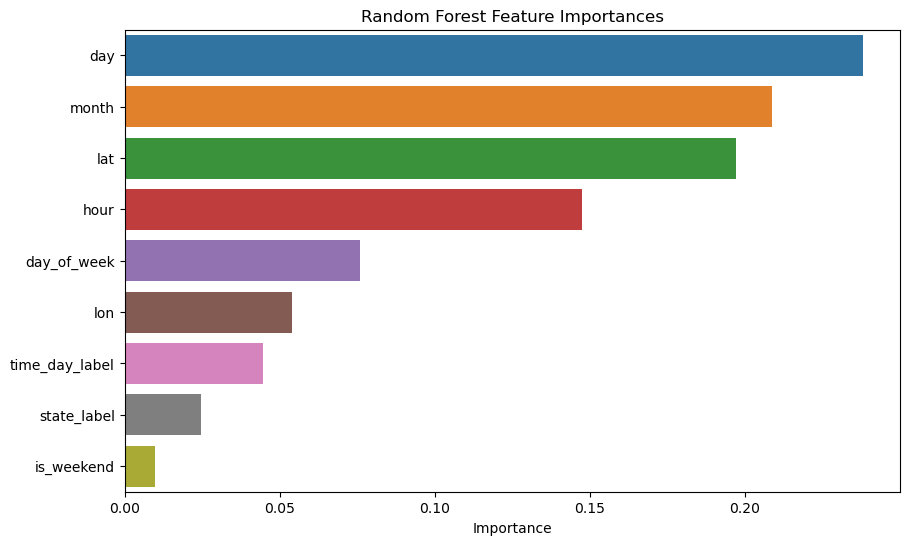

In [174]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'aqi' and other columns are in label_y
label_y = nigeria_air_pollution[['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
feature_x = nigeria_air_pollution[['lon', 'lat', 'month', 'day', 'hour','state_label','day_of_week','is_weekend','time_day_label']]

# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(feature_x, label_y)

# Get feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=feature_x.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title('Random Forest Feature Importances')
plt.show()


In [185]:
# features (X) and target variable (y)
X = nigeria_air_pollution_scaled[['lon', 'lat', 'month', 'day', 'hour','state_label','day_of_week','is_weekend','time_day_label']]
y = nigeria_air_pollution_scaled[['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# GBR model code...
gbr_engr_model = GradientBoostingRegressor()

# Wrapped into MultiOutputRegressor
multioutput_engr_gbr = MultiOutputRegressor(gbr_engr_model)

# Fit model with train
multioutput_engr_gbr.fit(X_train, y_train)

# Make predictions test
mgbr_engr_predictions = multioutput_engr_gbr.predict(X_test)
# metrics
mgbr_engr_rmse = np.sqrt(mean_squared_error(y_test, mgbr_engr_predictions))
mgbr_engr_mae = mean_absolute_error(y_test, mgbr_engr_predictions)
mgbr_engr_r2 = r2_score(y_test, mgbr_engr_predictions)
print("Gradient Boosting RMSE:", mgbr_engr_rmse)
print("Gradient Boosting MAE:", mgbr_engr_mae)
print("Gradient Boosting R2:", mgbr_engr_r2)

Gradient Boosting RMSE: 161.06962370817863
Gradient Boosting MAE: 37.109414126925195
Gradient Boosting R2: 0.4176114131285287


In [ ]:
# DataFrame for each output
mgbr_engr_predictions_df = pd.DataFrame(mgbr_engr_predictions, columns=['MGBR_aqi', 'MGBR_co', 'MGBR_no', 'MGBR_no2', 'MGBR_o3', 'MGBR_so2', 'MGBR_pm2_5', 'MGBR_pm10', 'MGBR_nh3'])

# Add the 'test' columns using column indices
y_test_columns = [0, 1, 2, 3, 4, 5, 6, 7, 8]  # Adjust these indices based on the actual columns in y_test
mgbr_engr_predictions_df[y_test_columns] = y_test.values

# Add the 'test' columns
# mgbr_engr_predictions[['y_test_aqi', 'y_test_co', 'y_test_no', 'y_test_no2', 'y_test_o3', 'y_test_so2', 'y_test_pm2_5', 'y_test_pm10', 'y_test_nh3']] = y_test.values
mgbr_engr_predictions.head()

# # Display only selected columns
# selected_columns = ['MGBR_aqi', 'y_test_aqi', 'MGBR_pm2_5', 'y_test_pm2_5', 'MGBR_pm10', 'y_test_pm10']
# mgbr_engr_predictions[selected_columns].head()



In [191]:
#save metrics
performance_metrics = {
    "Name" : "mgbr_engr_model_approach1w",
    'RMSE': mgbr_engr_rmse,
    'MAE' : mgbr_engr_mae,
    "R2 Score" : mgbr_engr_r2
}

with open('mgbr_Appr2_performance_metrics.json', 'w') as f:
    json.dump(performance_metrics, f)


In [192]:
# print predictions
result = pd.DataFrame(index=y_test.index)
result[['mgbr_Predicted_aqi', 'mgbr_Predicted_co', 'mgbr_Predicted_no', 'mgbr_Predicted_no2', 'mgbr_Predicted_o3', 'mgbr_Predicted_so2', 'mgbr_Predicted_pm2_5', 'mgbr_Predicted_pm10', 'mgbr_Predicted_nh3']] = mgbr_predictions

# Add the actual values
result[['y_test_aqi', 'y_test_co', 'y_test_no', 'y_test_no2', 'y_test_o3', 'y_test_so2', 'y_test_pm2_5', 'y_test_pm10', 'y_test_nh3']] = y_test

result.to_excel('pred_Result_MGBR2.xlsx')


In [193]:
# Save model
joblib.dump(multioutput_engr_gbr, 'mgbrappr_2_model.joblib')

['mgbrappr_2_model.joblib']

In [ ]:
# Generate random data for testing
np.random.seed(42)  # for reproducibility
random_data = pd.DataFrame({
    'lon': np.random.uniform(5, 10, size=1),
    'lat': np.random.uniform(5, 7, size=1),
    'month': np.random.randint(1, 13, size=1),
    'day': np.random.randint(1, 32, size=1),
    'hour': np.random.randint(0, 24, size=1),
    'state_label' : 24,
    'day_of_week' : np.random.randint(0, 6, size=1),
    'is_weekend' : np.random.randint(0, 1, size=1),
    'time_day_label' : np.random.randint(0, 3, size=1)
})

# Normalize
new_data_normalized = scaler.transform(random_data)

# Make a new prediction
new_pred = multioutput_engr_gbr.predict(new_data_normalized)

# Display the predicted AQI value
print(f"Predicted AQI Value: {new_pred[0]}")
